<a href="https://colab.research.google.com/github/ydg1021/basicRL/blob/main/example_TD_cliff.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

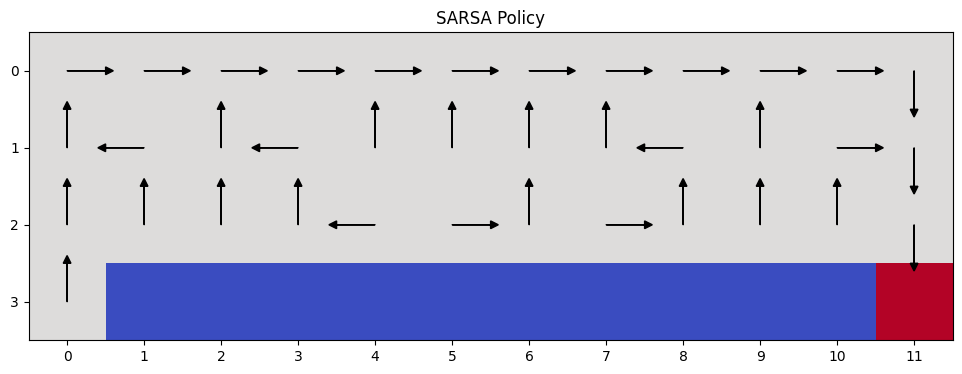

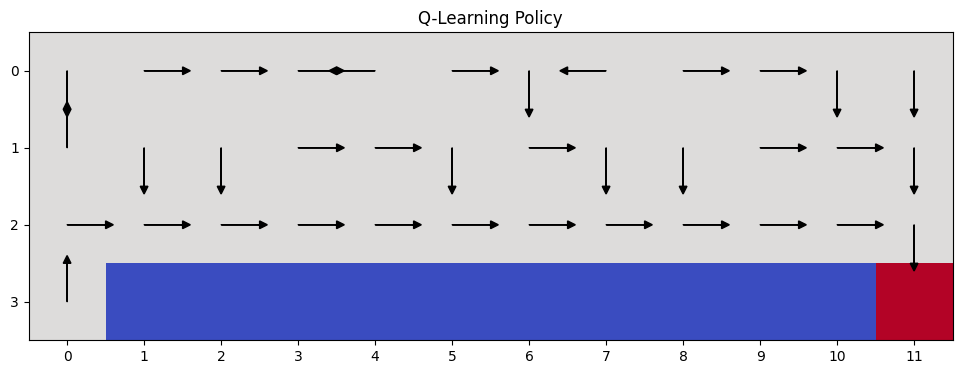

In [14]:
import numpy as np
import random
import matplotlib.pyplot as plt

# Grid dimensions and positions
GRID_ROWS = 4
GRID_COLS = 12
START = (3, 0)  # Starting position at bottom-left corner
GOAL = (3, 11)  # Goal position at bottom-right corner
CLIFF = [(3, i) for i in range(1, 11)]  # Cliff positions

# Actions
ACTIONS = ['left', 'up', 'right', 'down']
NUM_ACTIONS = len(ACTIONS)

# Function to take an action in the environment
def step(state, action):
    i, j = state
    if action == 'up':
        i = max(i - 1, 0)
    elif action == 'right':
        j = min(j + 1, GRID_COLS - 1)
    elif action == 'down':
        i = min(i + 1, GRID_ROWS - 1)
    elif action == 'left':
        j = max(j - 1, 0)

    if (i, j) in CLIFF:
        return START, -100  # Fall into the cliff
    elif (i, j) == GOAL:
        return (i, j), 0  # Reached goal
    else:
        return (i, j), -1  # Normal step

# Epsilon-greedy policy
def epsilon_greedy(Q, state, epsilon=0.1):
    if random.uniform(0, 1) < epsilon:
        return random.choice(ACTIONS)  # Explore
    else:
        return max(Q[state], key=Q[state].get)  # Exploit

# Initialize Q-values
def init_q():
    Q = {}
    for i in range(GRID_ROWS):
        for j in range(GRID_COLS):
            Q[(i, j)] = {}
            for action in ACTIONS:
                Q[(i, j)][action] = 0
    return Q

# SARSA algorithm
def sarsa(Q, alpha=0.5, gamma=0.9, episodes=500):
    for episode in range(episodes):
        state = START
        action = epsilon_greedy(Q, state)

        while state != GOAL:
            next_state, reward = step(state, action)
            next_action = epsilon_greedy(Q, next_state)
            Q[state][action] += alpha * (reward + gamma * Q[next_state][next_action] - Q[state][action])
            state, action = next_state, next_action

    return Q

# Q-Learning algorithm
def q_learning(Q, alpha=0.5, gamma=0.9, episodes=500):
    for episode in range(episodes):
        state = START

        while state != GOAL:
            action = epsilon_greedy(Q, state)
            next_state, reward = step(state, action)
            max_next = max(Q[next_state].values())
            Q[state][action] += alpha * (reward + gamma * max_next - Q[state][action])
            state = next_state

    return Q

# Function to plot policy
def plot_policy(Q, title):
    grid = np.zeros((GRID_ROWS, GRID_COLS))
    for row in range(GRID_ROWS):
        for col in range(GRID_COLS):
            if (row, col) in CLIFF:
                grid[row, col] = -1
            elif (row, col) == GOAL:
                grid[row, col] = 1

    plt.figure(figsize=(12, 4))
    plt.imshow(grid, cmap='coolwarm', interpolation='none')

    for i in range(GRID_ROWS):
        for j in range(GRID_COLS):
            if (i, j) in CLIFF or (i, j) == GOAL:
                continue
            action = max(Q[(i, j)], key=Q[(i, j)].get)
            if action == 'up':
                plt.arrow(j, i, 0, -0.5, head_width=0.1, head_length=0.1, fc='k', ec='k')
            elif action == 'right':
                plt.arrow(j, i, 0.5, 0, head_width=0.1, head_length=0.1, fc='k', ec='k')
            elif action == 'down':
                plt.arrow(j, i, 0, 0.5, head_width=0.1, head_length=0.1, fc='k', ec='k')
            elif action == 'left':
                plt.arrow(j, i, -0.5, 0, head_width=0.1, head_length=0.1, fc='k', ec='k')

    plt.xticks(range(GRID_COLS))
    plt.yticks(range(GRID_ROWS))
    plt.title(title)

# Main execution
if __name__ == "__main__":
    Q_sarsa = init_q()
    Q_q_learning = init_q()

    Q_sarsa_trained = sarsa(Q_sarsa)
    Q_q_learning_trained = q_learning(Q_q_learning)

    plot_policy(Q_sarsa_trained, "SARSA Policy")
    plot_policy(Q_q_learning_trained, "Q-Learning Policy")
    plt.show()

